In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [15]:
data = pd.read_csv('./Online Sales Data.csv')

In [16]:
data

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


#### 1. Analyze sales trends over time to identify seasonal patterns or growth opportunities.

In [19]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.strftime('%B')

In [20]:
data

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,January
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,January
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,January
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,January
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,January
...,...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal,August
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card,August
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card,August
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal,August


In [22]:
mes_mas_vendido = data['Month'].value_counts()
mes_mas_vendido

Month
January     31
March       31
May         31
July        31
April       30
June        30
February    29
August      27
Name: count, dtype: int64

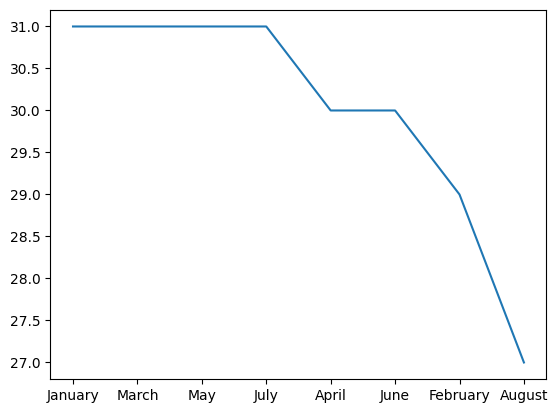

In [24]:
plt.plot(mes_mas_vendido.index, mes_mas_vendido.values)

Conclusion > En los primeros meses del año, las ventas incrementa mientras que en el segundo ciclo del año, disminuyen. Pero no es una notable diferencia, es poco lo que se reduce.

#### 2. Explore the popularity of different product categories across regions.

In [33]:
data['Product Category'].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [34]:
data['Region'].unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

In [42]:
producto_mas_vendido_por_region = data.groupby('Region')['Product Category'].value_counts().reset_index()
producto_mas_vendido_por_region

,Region,Product Category,count
0,Asia,Clothing,40
1,Asia,Sports,40
2,Europe,Beauty Products,40
3,Europe,Home Appliances,40
4,North America,Books,40
5,North America,Electronics,40


([0, 1, 2],
 [Text(0, 0, 'Asia'), Text(1, 0, 'Europe'), Text(2, 0, 'North America')])

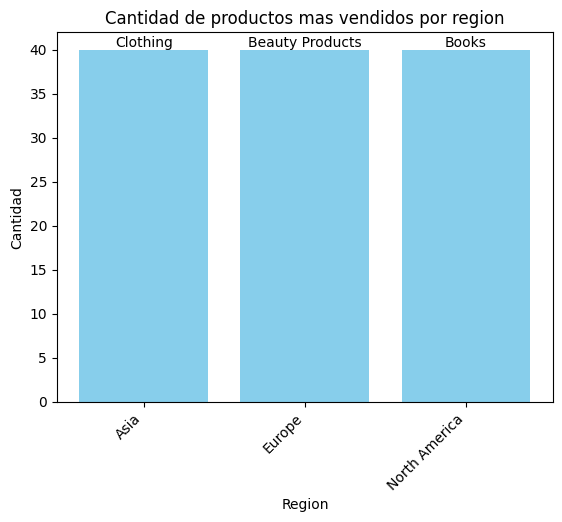

In [72]:
plt.bar(producto_mas_vendido_por_region['Region'], producto_mas_vendido_por_region['count'], color='skyblue')
for i in range(len(producto_mas_vendido_por_region)):
    plt.text(producto_mas_vendido_por_region['Region'][i], producto_mas_vendido_por_region['count'][i],
             producto_mas_vendido_por_region['Product Category'][i], ha='center', va='bottom')
plt.xlabel("Region")
plt.ylabel("Cantidad")
plt.title("Cantidad de productos mas vendidos por region")
plt.xticks(rotation = 45, ha = 'right')

#### 3. Investigate the impact of payment methods on sales volume or revenue.

In [35]:
data

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,January
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,January
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,January
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,January
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,January
...,...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal,August
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card,August
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card,August
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal,August


In [89]:
metodos_pago_mas_usados = data['Payment Method'].value_counts()
metodos_pago_mas_usados

Payment Method
Credit Card    120
PayPal          80
Debit Card      40
Name: count, dtype: int64

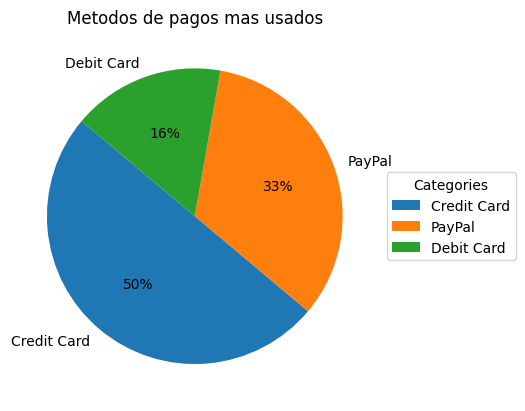

In [99]:
plt.title("Metodos de pagos mas usados")
plt.pie(metodos_pago_mas_usados.values, labels=metodos_pago_mas_usados.index, autopct='%1d%%', startangle=140)
plt.legend(metodos_pago_mas_usados.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

In [86]:
pagos_por_metodo_de_pago = data.groupby('Payment Method')['Total Revenue'].agg(['mean', 'min', 'max', 'sum'])
pagos_por_metodo_de_pago

,mean,min,max,sum
Payment Method,,,,
Credit Card,426.423833,17.98,3899.99,51170.86
Debit Card,203.223250,39.60,539.94,8128.93
PayPal,265.850750,6.50,2599.98,21268.06


([0, 1, 2],
 [Text(0, 0, 'Credit Card'), Text(1, 0, 'Debit Card'), Text(2, 0, 'PayPal')])

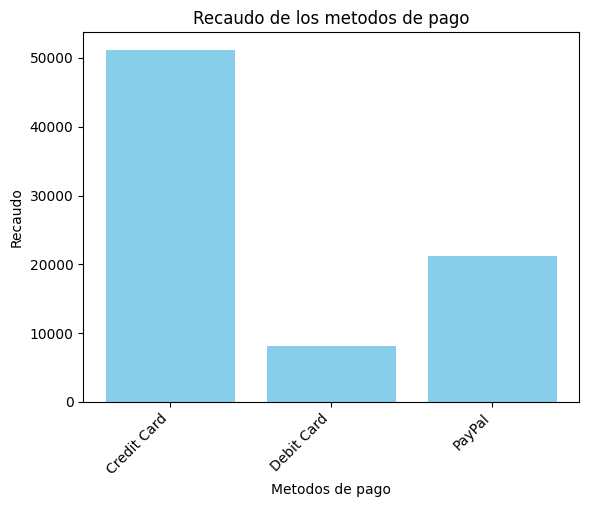

In [88]:
plt.title("Recaudo de los metodos de pago")
plt.bar(pagos_por_metodo_de_pago.index, pagos_por_metodo_de_pago['sum'], color='skyblue')
plt.xlabel("Metodos de pago")
plt.ylabel("Recaudo")
plt.xticks(rotation = 45, ha='right')

Conclusion > El metodo de pago mas usado es Credit Card con 120 pagos realizados y un total de $ 51170.86 reunidos en comparacion a Paypal con 80 pagos y Debit Card con 40 pagos.

#### 4. Identify top-selling products within each category to optimize inventory and marketing strategies.

In [112]:
data['Units Sold'].max()

10

In [135]:
productos_mas_vendidos = data.groupby('Product Name')['Units Sold'].sum().reset_index()
df_productos_mas_vendidos = productos_mas_vendidos.sort_values(by='Units Sold', ascending=False)

In [138]:
df_productos_mas_vendidos

,Product Name,Units Sold
93,Hanes ComfortSoft T-Shirt,10
181,The Catcher in the Rye by J.D. Salinger,7
225,Yeti Rambler Tumbler,6
74,Gap Essential Crewneck T-Shirt,6
173,Spalding NBA Street Basketball,6
...,...,...
129,Nespresso VertuoPlus,1
128,Nespresso Vertuo Next Coffee and Espresso Maker,1
127,NARS Radiant Creamy Concealer,1
126,Microsoft Surface Laptop 4,1


In [136]:
df_productos_mas_vendidos.describe()

,Units Sold
count,232.000000
mean,2.232759
std,1.397944
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,10.000000


In [137]:
df_productos_mas_vendidos[(df_productos_mas_vendidos['Units Sold'] > 5)]

,Product Name,Units Sold
93,Hanes ComfortSoft T-Shirt,10
181,The Catcher in the Rye by J.D. Salinger,7
225,Yeti Rambler Tumbler,6
74,Gap Essential Crewneck T-Shirt,6
173,Spalding NBA Street Basketball,6
132,Nike Air Force 1,6


In [141]:
df_productos_mas_vendidos[(df_productos_mas_vendidos['Units Sold'] < 2)]

,Product Name,Units Sold
228,Youth to the People Superfood Antioxidant Clea...,1
227,Yeti Tundra Haul Portable Wheeled Cooler,1
33,Bowflex SelectTech 552 Dumbbells,1
18,Apple MacBook Pro 16-inch,1
34,Breville Nespresso Creatista Plus,1
...,...,...
129,Nespresso VertuoPlus,1
128,Nespresso Vertuo Next Coffee and Espresso Maker,1
127,NARS Radiant Creamy Concealer,1
126,Microsoft Surface Laptop 4,1


Conclusion > Los productos menos vendidos se muestran en la tabla anterior. Cuenta con un total de 93 productos con una (1) sola venta.

####  5. Evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly.

In [156]:
cantidad_producto_region = data.groupby(['Product Name', 'Region'])['Units Sold'].value_counts().reset_index()
cantidad_producto_region.sort_values(by= "Units Sold", ascending=False)

,Product Name,Region,Units Sold,count
95,Hanes ComfortSoft T-Shirt,Asia,10,1
232,Yeti Rambler Tumbler,Asia,6,1
75,Gap Essential Crewneck T-Shirt,Asia,6,1
135,Nike Air Force 1,Asia,6,1
177,Spalding NBA Street Basketball,Asia,6,1
...,...,...,...,...
130,NARS Radiant Creamy Concealer,Europe,1,1
129,Microsoft Surface Laptop 4,North America,1,1
53,De'Longhi Magnifica Espresso Machine,Europe,1,1
127,MacBook Pro 16-inch,North America,1,1


Conclusion > La tabla anterior muestra como se han vendido los productos segun la region

In [160]:
cantidad_producto_region = data.groupby(['Product Category', 'Region'])['Units Sold'].sum().reset_index()
cantidad_producto_region.sort_values(by= ["Region","Units Sold"], ascending=[False, False])

,Product Category,Region,Units Sold
1,Books,North America,114
3,Electronics,North America,66
4,Home Appliances,Europe,59
0,Beauty Products,Europe,46
2,Clothing,Asia,145
5,Sports,Asia,88


Conclusion > La tabla anterior muestra las categorias de productos por Region, la cantidad vendida y la cantidad de productos relacionado a la categoria mostrando de mayor a menor las unidades vendidas segun la region